<a href="https://colab.research.google.com/github/Brikca/bpjs-bpu-membership-dynamics-and-forecasting-diy/blob/main/Analisis_Data_Kepesertaan_BPU_BPJS_TK_DIY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plot Peserta

In [ ]:
library(readxl)

In [ ]:
df_raw <- read_excel("/content/Data Peserta Aktif BPU.xlsx")

# Ambil kolom BPU sebagai numeric
val <- as.numeric(df_raw$Peserta_BPU)

# Bentuk objek time series bulanan
bpu_ts <- ts(val, start = c(2016, 1), frequency = 12)
bpu_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,8837,15401,15401,22470,22370,23222,22324,22949,24723,23072,21135,19690
2017,18329,16021,13459,11277,9038,8755,8702,7049,6267,8464,8545,8354
2018,9871,9874,10487,15490,21230,21443,25504,19229,15105,12108,11509,11172
2019,11998,11426,10683,10472,10569,10674,11256,10868,10871,12430,11272,11457
2020,12024,9125,8962,8876,7912,6524,6669,6611,7213,7387,7595,7809
2021,7827,8084,8499,9654,10350,10028,9586,9388,9678,10918,12480,16812
2022,17258,16894,17934,18506,16905,21647,24995,31308,32458,33048,33189,29510
2023,31585,31174,30359,28618,29486,32869,45868,46836,51268,52515,52107,51502
2024,40147,36264,33499,31936,34658,40335,51748,54322,54430,57739,54043,49398
2025,51596,42673,35882,34559,32543,49037,56845,,,,,


Data yang digunakan dalam analisis ini merupakan data runtun waktu (*time series*) bulanan mengenai jumlah peserta aktif Bukan Penerima Upah (BPU) BPJS Ketenagakerjaan Kota Yogyakarta (L03).Data diperoleh dari rekap internal kepesertaan BPJS Ketenagakerjaan Kantor Cabang Kota Yogyakarta. Periode pengamatan mencakup Januari 2016 hingga Juli 2025.

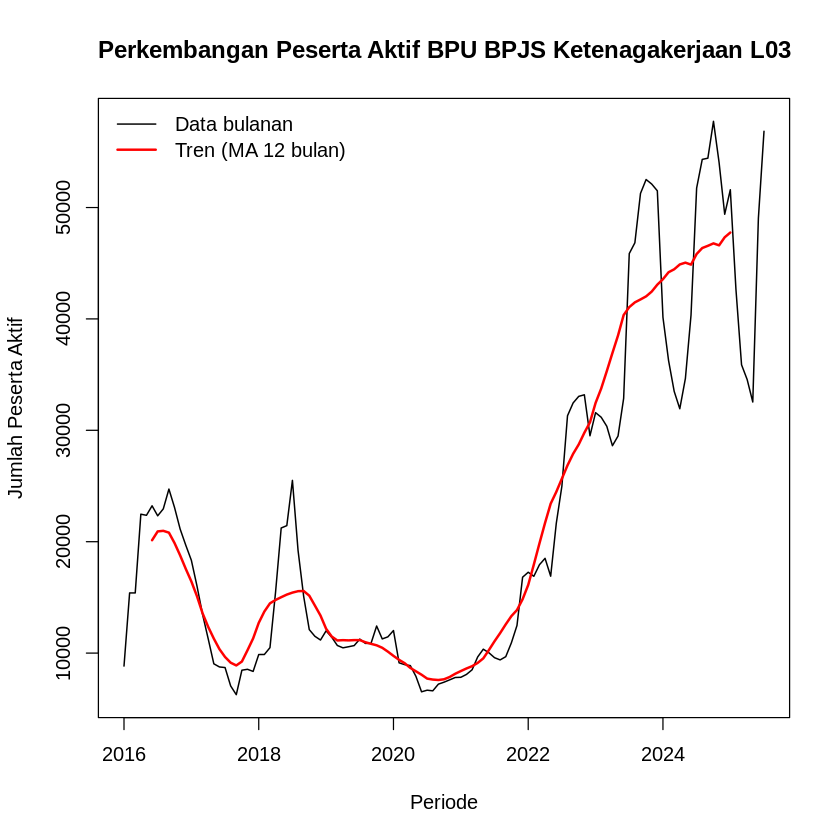

In [ ]:
# Moving average 12-bulan (tren halus)
ma12 <- stats::filter(bpu_ts, filter = rep(1/12, 12), sides = 2)

# Plot series + tren
plot(bpu_ts,
     main = "Perkembangan Peserta Aktif BPU BPJS Ketenagakerjaan L03",
     xlab = "Periode",
     ylab = "Jumlah Peserta Aktif",
     col  = "black",
     lwd  = 1.2)

lines(ma12, col = "red", lwd = 2)

legend("topleft",
       legend = c("Data bulanan", "Tren (MA 12 bulan)"),
       col    = c("black", "red"),
       lwd    = c(1.2, 2),
       bty    = "n")


In [ ]:
# install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(zoo)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# Buat data frame dari time series
df_ts <- data.frame(
  periode = as.Date(as.yearmon(time(bpu_ts))),  # butuh zoo
  peserta = as.numeric(bpu_ts)
)



df_ts$tahun <- format(df_ts$periode, "%Y")

# Ringkasan tahunan
tab_tahun <- aggregate(peserta ~ tahun, data = df_ts, FUN = function(x) {
  c(mean = mean(x), min = min(x), max = max(x))
})

# Rapikan kolom
tab_tahun <- data.frame(
  Tahun = tab_tahun$tahun,
  Rata_rata = round(tab_tahun$peserta[, "mean"], 0),
  Minimum   = tab_tahun$peserta[, "min"],
  Maksimum  = tab_tahun$peserta[, "max"]
)

tab_tahun

Tahun,Rata_rata,Minimum,Maksimum
<chr>,<dbl>,<dbl>,<dbl>
2016,20133,8837,24723
2017,10355,6267,18329
2018,15252,9871,25504
2019,11165,10472,12430
2020,8059,6524,12024
2021,10275,7827,16812
2022,24471,16894,33189
2023,40349,28618,52515
2024,44877,31936,57739


## Periode kenaikan dan penuruanan

In [ ]:
min_val <- min(bpu_ts, na.rm = TRUE)
max_val <- max(bpu_ts, na.rm = TRUE)

min_time <- time(bpu_ts)[which.min(bpu_ts)]
max_time <- time(bpu_ts)[which.max(bpu_ts)]

min_val; min_time
max_val; max_time


[1] 6267

[1] 2017.667

[1] 57739

[1] 2024.75

In [ ]:
library(zoo)

min_periode <- format(as.yearmon(min_time), "%b %Y")
max_periode <- format(as.yearmon(max_time), "%b %Y")

min_periode
max_periode


[1] "Sep 2017"

[1] "Oct 2024"

In [ ]:
library(zoo)

# Selisih antar bulan
diff_bpu <- diff(bpu_ts)

# Buat data frame perubahan bulanan
df_diff <- data.frame(
  periode = as.yearmon(time(diff_bpu)),
  perubahan = as.numeric(diff_bpu)
)

# Top 5 kenaikan terbesar
top_naik <- df_diff[order(-df_diff$perubahan), ][1:5, ]
top_naik$periode <- format(top_naik$periode, "%b %Y")

# Top 5 penurunan terbesar
top_turun <- df_diff[order(df_diff$perubahan), ][1:5, ]
top_turun$periode <- format(top_turun$periode, "%b %Y")

top_naik
top_turun


,periode,perubahan
,<chr>,<dbl>
113,Jun 2025,16494
90,Jul 2023,12999
102,Jul 2024,11413
114,Jul 2025,7808
3,Apr 2016,7069


,periode,perubahan
,<chr>,<dbl>
96,Jan 2024,-11355
109,Feb 2025,-8923
110,Mar 2025,-6791
31,Aug 2018,-6275
107,Dec 2024,-4645


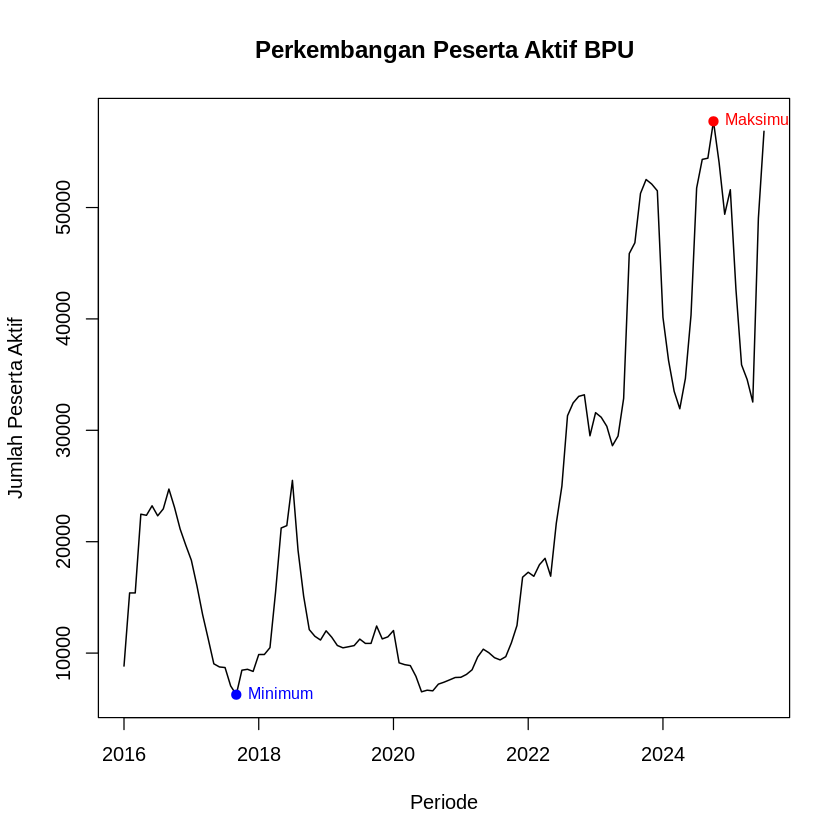

In [ ]:
plot(bpu_ts,
     main = "Perkembangan Peserta Aktif BPU",
     xlab = "Periode",
     ylab = "Jumlah Peserta Aktif",
     col  = "black",
     lwd  = 1.2)

# titik min dan max
points(time(bpu_ts)[which.min(bpu_ts)], min(bpu_ts), pch = 19, col = "blue")
points(time(bpu_ts)[which.max(bpu_ts)], max(bpu_ts), pch = 19, col = "red")

text(time(bpu_ts)[which.min(bpu_ts)], min(bpu_ts),
     labels = "Minimum", pos = 4, cex = 0.8, col = "blue")
text(time(bpu_ts)[which.max(bpu_ts)], max(bpu_ts),
     labels = "Maksimum", pos = 4, cex = 0.8, col = "red")

# Net Growth Peserta BPU

In [ ]:
library(readxl)

In [ ]:
df_raw <- read_excel("/content/Data Peserta Aktif BPU.xlsx")

In [ ]:
str(df_raw)
head(df_raw)
colnames(df_raw)

tibble [115 × 2] (S3: tbl_df/tbl/data.frame)
 $ Periode    : chr [1:115] "2016-01" "2016-02" "2016-03" "2016-04" ...
 $ Peserta_BPU: num [1:115] 8837 15401 15401 22470 22370 ...


Periode,Peserta_BPU
<chr>,<dbl>
2016-01,8837
2016-02,15401
2016-03,15401
2016-04,22470
2016-05,22370
2016-06,23222


[1] "Periode"     "Peserta_BPU"

In [ ]:
df_raw$Peserta_BPU <- as.numeric(df_raw$Peserta_BPU)

In [ ]:
summary(df_raw$Peserta_BPU)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6267    9951   16812   21934   31760   57739 

In [ ]:
sum(is.na(df_raw$Peserta_BPU))

[1] 0

In [ ]:
df_raw$Periode <- seq(
  from = as.Date("2016-01-01"),
  by   = "month",
  length.out = nrow(df_raw)
)

In [ ]:
head(df_raw)

Periode,Peserta_BPU
<date>,<dbl>
2016-01-01,8837
2016-02-01,15401
2016-03-01,15401
2016-04-01,22470
2016-05-01,22370
2016-06-01,23222


In [ ]:
tail(df_raw)

Periode,Peserta_BPU
<date>,<dbl>
2025-02-01,42673
2025-03-01,35882
2025-04-01,34559
2025-05-01,32543
2025-06-01,49037
2025-07-01,56845


In [ ]:
# Hitung Net Growth (jumlah)
df_raw$Net_Growth <- c(NA, diff(df_raw$Peserta_BPU))

In [ ]:
# Hitung Net Groeth Rate
df_raw$Net_Growth_Rate <- c(
  NA,
  diff(df_raw$Peserta_BPU) / head(df_raw$Peserta_BPU, -1) * 100
)

In [ ]:
head(df_raw, 6)
tail(df_raw, 6)

Periode,Peserta_BPU,Net_Growth,Net_Growth_Rate
<date>,<dbl>,<dbl>,<dbl>
2016-01-01,8837,NA,NA
2016-02-01,15401,6564,74.2786013
2016-03-01,15401,0,0.0000000
2016-04-01,22470,7069,45.8996169
2016-05-01,22370,-100,-0.4450378
2016-06-01,23222,852,3.8086723


Periode,Peserta_BPU,Net_Growth,Net_Growth_Rate
<date>,<dbl>,<dbl>,<dbl>
2025-02-01,42673,-8923,-17.293976
2025-03-01,35882,-6791,-15.914044
2025-04-01,34559,-1323,-3.687085
2025-05-01,32543,-2016,-5.833502
2025-06-01,49037,16494,50.683711
2025-07-01,56845,7808,15.922671


In [ ]:
# install.packages('zoo')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(zoo)

# Hitung Net Growth
df_raw$Net_Growth <- c(NA, diff(df_raw$Peserta_BPU))

# Buat data frame untuk analisis perubahan bulanan
df_ng <- data.frame(
  Periode = as.yearmon(df_raw$Periode[-1]),
  Net_Growth = df_raw$Net_Growth[-1]
)

# Top 5 Net Growth tertinggi (kenaikan terbesar)
top5_naik <- df_ng[order(-df_ng$Net_Growth), ][1:5, ]

# Top 5 Net Growth terendah (penurunan terbesar)
top5_turun <- df_ng[order(df_ng$Net_Growth), ][1:5, ]

top5_naik
top5_turun


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




,Periode,Net_Growth
,<yearmon>,<dbl>
113,Jun 2025,16494
90,Jul 2023,12999
102,Jul 2024,11413
114,Jul 2025,7808
3,Apr 2016,7069


,Periode,Net_Growth
,<yearmon>,<dbl>
96,Jan 2024,-11355
109,Feb 2025,-8923
110,Mar 2025,-6791
31,Aug 2018,-6275
107,Dec 2024,-4645


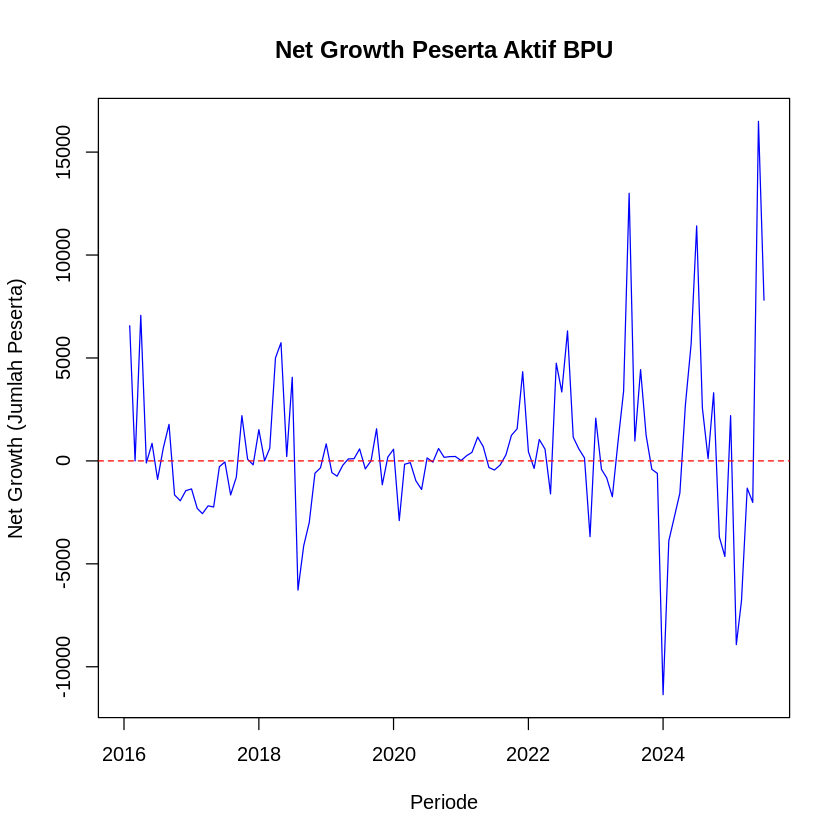

In [ ]:
plot(df_raw$Periode, df_raw$Net_Growth,
     type = "l",
     col = "blue",
     xlab = "Periode",
     ylab = "Net Growth (Jumlah Peserta)",
     main = "Net Growth Peserta Aktif BPU")

abline(h = 0, col = "red", lty = 2)

Gambar di atas menujukkan bahwa, garis horizontal putus-putus sebagai batas *Net Growth* nol. Nilai di atas garis nol menunjukkan pertumbuhan bersih, sedangkan nilai di bawah garis nol menunjukkan penurunan bersih jumlah peserta aktif. Berdasarkan
Gambar di atas, *Net Growth* pada periode awal pengamatan (2016–2018) menunjukkan fluktuasi dengan beberapa lonjakan positif, seperti pada Februari 2016 yang meningkat sebesar 6.564 peserta (74,28%) dan April 2016 yang meningkat sebesar 7.069 peserta dibandingkan periode sebelumnya. Namun demikian, terdapat pula periode dengan *Net Growth* negatif yang mengindikasikan penurunan jumlah peserta aktif.

# Churn Rate

In [ ]:
# Hitung churn (jumlah)
df_raw$Churn <- c(
  NA,
  pmax(0, head(df_raw$Peserta_BPU, -1) - df_raw$Peserta_BPU[-1])
)

# Hitung churn rate (%)
df_raw$Churn_Rate <- c(
  NA,
  df_raw$Churn[-1] / head(df_raw$Peserta_BPU, -1) * 100
)

In [ ]:
tail(df_raw, 10)

Periode,Peserta_BPU,Net_Growth,Net_Growth_Rate,Churn,Churn_Rate
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024-10-01,57739,3309,6.079368,0,0.000000
2024-11-01,54043,-3696,-6.401219,3696,6.401219
2024-12-01,49398,-4645,-8.595008,4645,8.595008
2025-01-01,51596,2198,4.449573,0,0.000000
2025-02-01,42673,-8923,-17.293976,8923,17.293976
2025-03-01,35882,-6791,-15.914044,6791,15.914044
2025-04-01,34559,-1323,-3.687085,1323,3.687085
2025-05-01,32543,-2016,-5.833502,2016,5.833502
2025-06-01,49037,16494,50.683711,0,0.000000


In [ ]:
# install.packages('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(zoo)

tab_top_churnrate <- df_raw %>%
  filter(!is.na(Churn_Rate)) %>%
  mutate(
    Periode_fmt = format(as.yearmon(Periode), "%b %Y"),
    Peserta_Awal = lag(Peserta_BPU)
  ) %>%
  arrange(desc(Churn_Rate)) %>%
  select(Periode = Periode_fmt, Peserta_Awal, Churn, Churn_Rate) %>%
  head(10)

tab_top_churnrate

Periode,Peserta_Awal,Churn,Churn_Rate
<chr>,<dbl>,<dbl>,<dbl>
Aug 2018,25504,6275,24.60398
Feb 2020,12024,2899,24.11011
Jan 2024,51502,11355,22.04769
Sep 2018,19229,4124,21.44677
May 2017,11277,2239,19.85457
Oct 2018,15105,2997,19.84111
Aug 2017,8702,1653,18.99563
Jun 2020,7912,1388,17.54297
Feb 2025,51596,8923,17.29398


In [ ]:
tab_top_churn <- df_raw %>%
  filter(!is.na(Churn)) %>%
  mutate(
    Periode_fmt = format(as.yearmon(Periode), "%b %Y"),
    Peserta_Awal = lag(Peserta_BPU)
  ) %>%
  arrange(desc(Churn)) %>%
  select(Periode = Periode_fmt, Peserta_Awal, Churn, Churn_Rate) %>%
  head(10)

tab_top_churn

Periode,Peserta_Awal,Churn,Churn_Rate
<chr>,<dbl>,<dbl>,<dbl>
Jan 2024,51502,11355,22.047687
Feb 2025,51596,8923,17.293976
Mar 2025,42673,6791,15.914044
Aug 2018,25504,6275,24.603984
Dec 2024,54043,4645,8.595008
Sep 2018,19229,4124,21.446773
Feb 2024,40147,3883,9.671956
Nov 2024,57739,3696,6.401219
Dec 2022,33189,3679,11.084998


Analisis Net Growth mengindikasikan bahwa dinamika kepesertaan BPU di Kota Yogyakarta bersifat tidak stabil antarbulan. Oleh karena itu, diperlukan analisis lanjutan menggunakan churn dan churn rate untuk melihat apakah penurunan tersebut terkait dengan meningkatnya jumlah peserta keluar atau berhenti aktif.

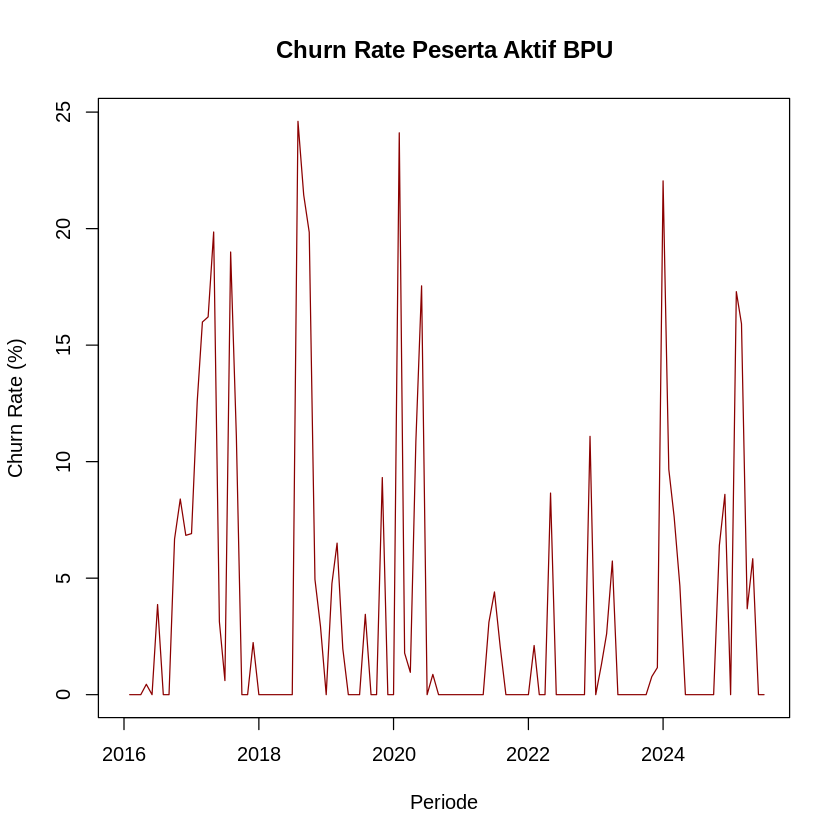

In [ ]:
plot(df_raw$Periode, df_raw$Churn_Rate,
     type = "l",
     col = "darkred",
     xlab = "Periode",
     ylab = "Churn Rate (%)",
     main = "Churn Rate Peserta Aktif BPU")

In [ ]:
# Cek: jika Net Growth negatif, Churn = -Net Growth
check_consistency <- with(df_raw,
  ifelse(
    Net_Growth < 0,
    abs(Net_Growth) == Churn,
    Churn == 0
  )
)

table(check_consistency, useNA = "ifany")

check_consistency
TRUE <NA> 
 114    1 

Analisis churn dan churn rate memberikan gambaran yang lebih spesifik tentang kestabilan kepesertaan BPU serta membantu mengidentifikasi periode kritis yang memerlukan perhatian dalam pengelolaan kepesertaan.

# ARIMA

In [ ]:
install.packages("tseries")
install.packages("forecast")
install.packages("TTR")
install.packages("TSA")
install.packages("astsa")
install.packages("car")
install.packages("portes")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘zoo’, ‘quantmod’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘leaps’, ‘locfit’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Installing p

In [ ]:
library("readxl")
library("tseries")
library("forecast")
library("TTR")
library("TSA")
library("graphics")
library("astsa")
library("car")
library("portes")
library("ggplot2")

In [ ]:
library(readxl)

In [ ]:
df_raw <- read_excel("/content/Data Peserta Aktif BPU.xlsx")

# Ambil kolom BPU sebagai numeric
val <- as.numeric(df_raw$Peserta_BPU)

# Bentuk objek time series bulanan
bpu_ts <- ts(val, start = c(2016, 1), frequency = 12)
bpu_ts

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2016,8837,15401,15401,22470,22370,23222,22324,22949,24723,23072,21135,19690
2017,18329,16021,13459,11277,9038,8755,8702,7049,6267,8464,8545,8354
2018,9871,9874,10487,15490,21230,21443,25504,19229,15105,12108,11509,11172
2019,11998,11426,10683,10472,10569,10674,11256,10868,10871,12430,11272,11457
2020,12024,9125,8962,8876,7912,6524,6669,6611,7213,7387,7595,7809
2021,7827,8084,8499,9654,10350,10028,9586,9388,9678,10918,12480,16812
2022,17258,16894,17934,18506,16905,21647,24995,31308,32458,33048,33189,29510
2023,31585,31174,30359,28618,29486,32869,45868,46836,51268,52515,52107,51502
2024,40147,36264,33499,31936,34658,40335,51748,54322,54430,57739,54043,49398
2025,51596,42673,35882,34559,32543,49037,56845,,,,,


In [ ]:
summary(bpu_ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6267    9951   16812   21934   31760   57739 

## Melihat Pola Data



### Plot Data Awal

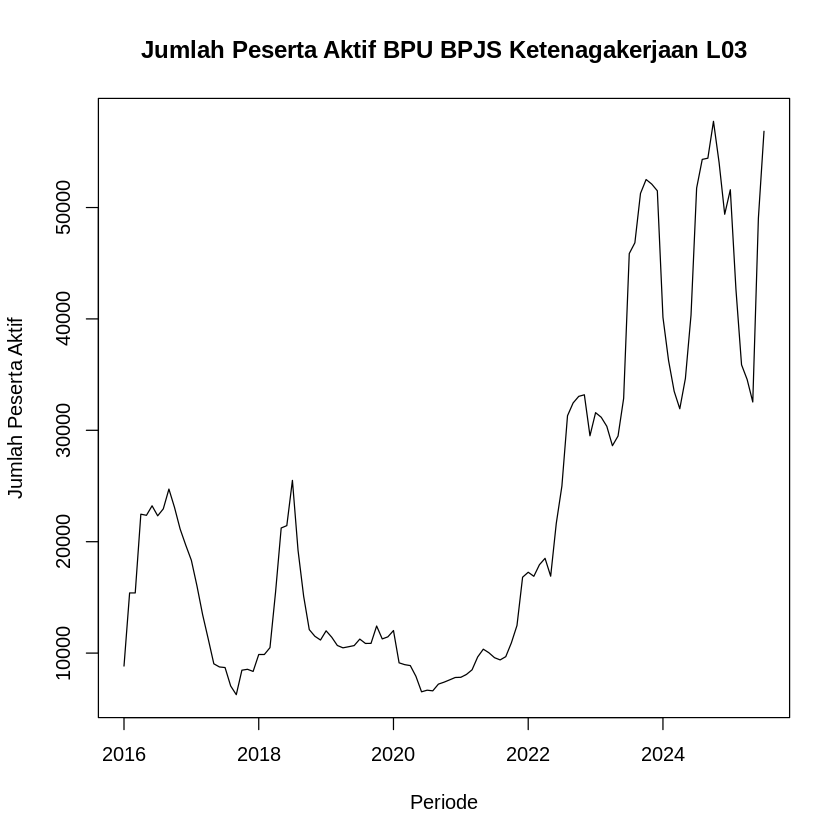

In [ ]:
plot(bpu_ts,
     main = "Jumlah Peserta Aktif BPU BPJS Ketenagakerjaan L03",
     xlab = "Periode",
     ylab = "Jumlah Peserta Aktif")

Berdasarkan plot di atas, jumlah peserta aktif BPU menunjukkan pola yang berubah cukup tajam dan tidak stabil dari bulan ke bulan.

### Plot ACF

In [ ]:
adf.test(bpu_ts)


	Augmented Dickey-Fuller Test

data:  bpu_ts
Dickey-Fuller = -1.6572, Lag order = 4, p-value = 0.7189
alternative hypothesis: stationary


nilai p-value sebesar 0,7189 lebih besar daripada 0,05. Dengan demikian, $𝐻_0$ gagal ditolak, sehingga dapat disimpulkan bahwa data asli jumlah peserta aktif BPU tidak stasioner.

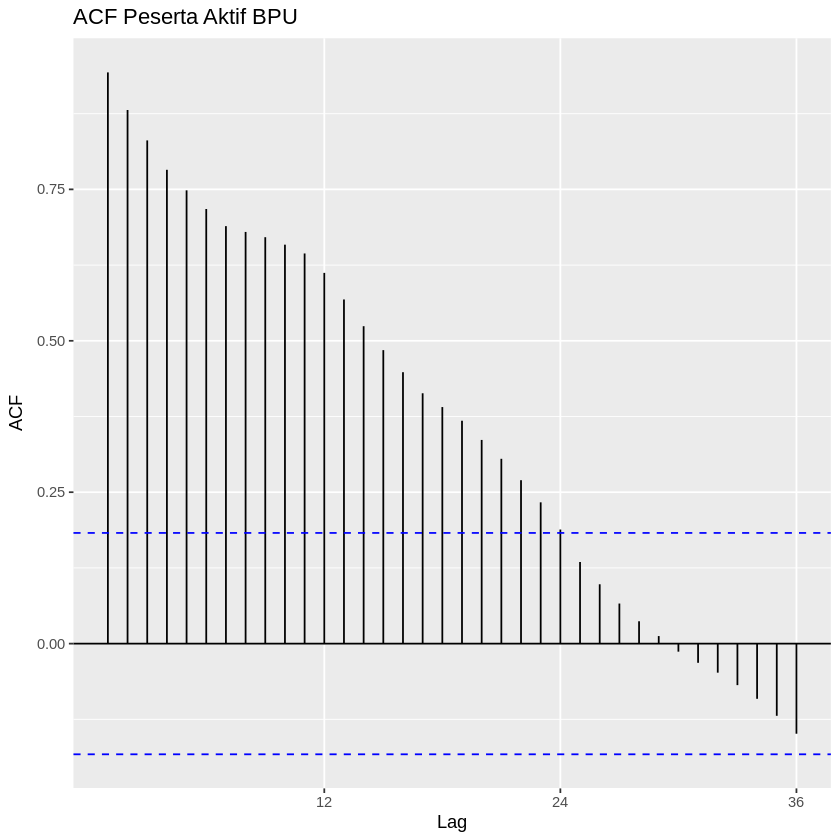

In [ ]:
ggAcf(bpu_ts, lag.max = 36) + ggtitle("ACF Peserta Aktif BPU")

In [ ]:
ndiffs(log(bpu_ts), test = "adf")

[1] 1

Data asli tidak stasioner, oleh sebab itu akan dilakukan proses penstasioneran melalui differencing orde 1. Penentuan jumlah differencing menunjukkan bahwa data memerlukan 1 kali differencing (𝑑 = 1).

### Tranformasi Data

In [ ]:
##Checking the Number of Differences Required
ndiffs(log(bpu_ts),"adf")

Warning message in ndiffs(log(bpu_ts), "adf"):
“Specified alpha value is larger than the maximum, setting alpha=0.1”


[1] 1

Warning message in adf.test(ddif1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  ddif1
Dickey-Fuller = -6.0725, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


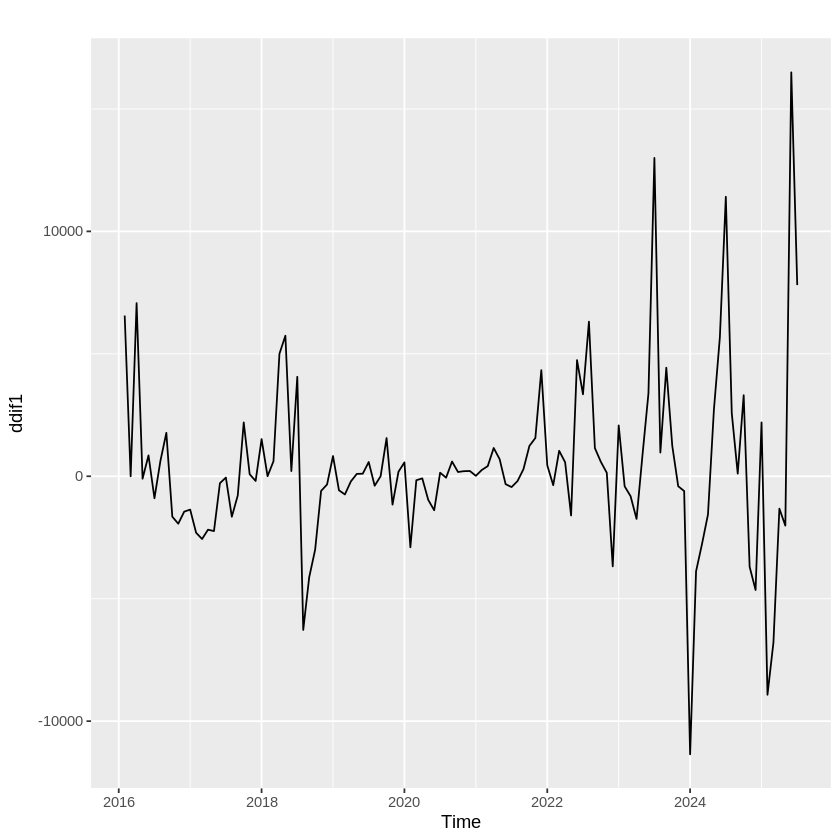

In [ ]:
##Diff 1
ddif1 = diff(bpu_ts, differences=1)
adf.test(ddif1)
autoplot(ddif1)

Warning message in adf.test(dtrans1):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  dtrans1
Dickey-Fuller = -5.4572, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


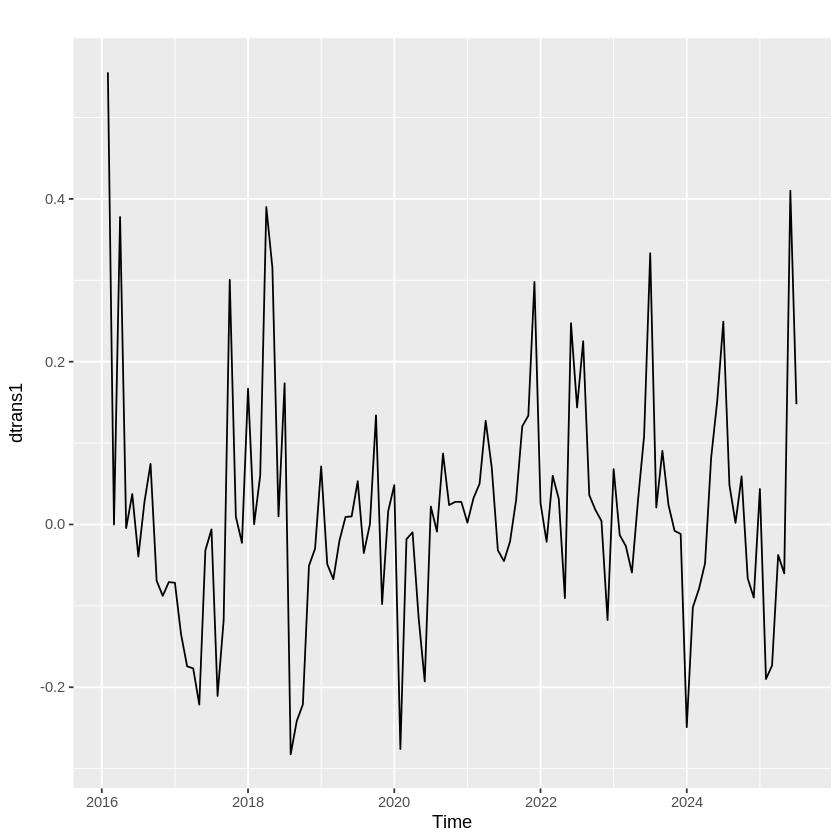

In [ ]:
#Diff 1 with Log-Trans
dtrans1 = diff(log(bpu_ts), differences=1)
adf.test(dtrans1)
autoplot(dtrans1)

Berdasarkan uji ADF data hasil differencing orde 1 tanpa transformasi logaritmik dan data hasil transformasi logaritmik yang diikuti differencing orde 1 sama-sama menghasilkan data yang stasioner Nilai mutlak statistic Dickey-Fuller pada ddif1 sebesar 6,0725 dan pada dtrans1 sebesar 5,4572. Mengingat kedua data telah memenuhi asumsi kestasioneritas, maka dipilih orde 1 tanpa transformasi logaritmik sebagai dasar identifikasi model ARIMA karena lebih sederhana serta tetap memenuhi syarat stasioneritas untuk tahapan berikutnya. Pemilihan ini dilakukan untuk mempertahankan interpretasi data pada skala asli serta karena data telah memenuhi prasyarat stasioneritas untuk analisis ACF dan
PACF.

## Identifikasi Model Awal

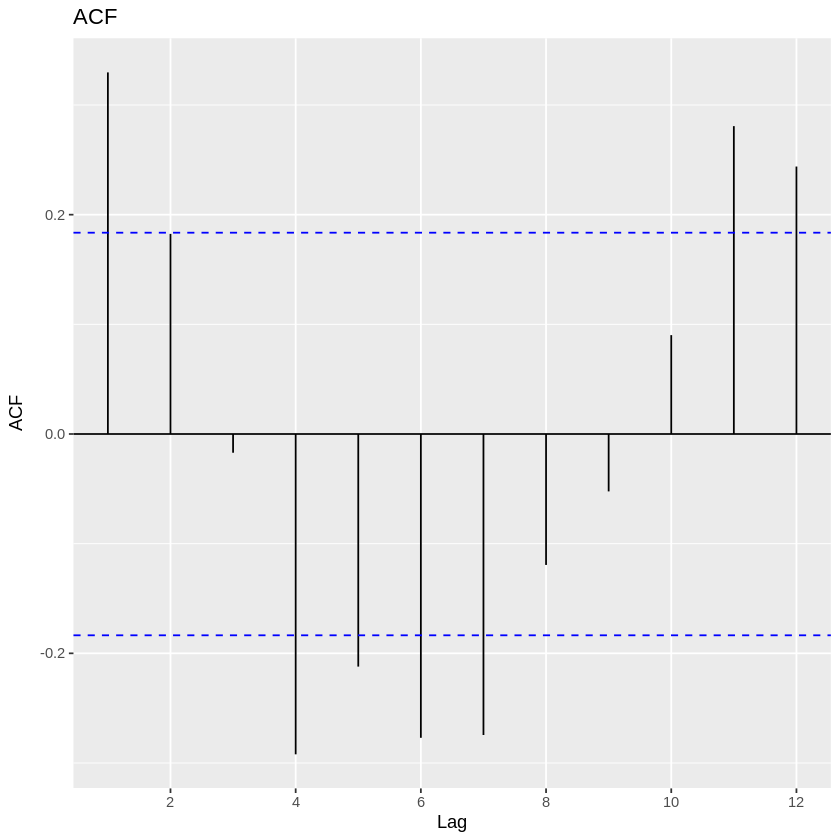

In [ ]:
# Plot Autocorrelation Function
ggAcf(ddif1,lag.max = 12) + ggtitle("ACF")

Dari plot ACF di atas, diperoleh bahwa sebelum lag keempat, plot terpotong terakhir pada lag keempat, sehingga diperoleh parameter moving average q = 4.

In [ ]:
acf(ddif1, lag.max=5, plot=F)


Autocorrelations of series ‘ddif1’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 
 0.330  0.182 -0.017 -0.292 -0.212 

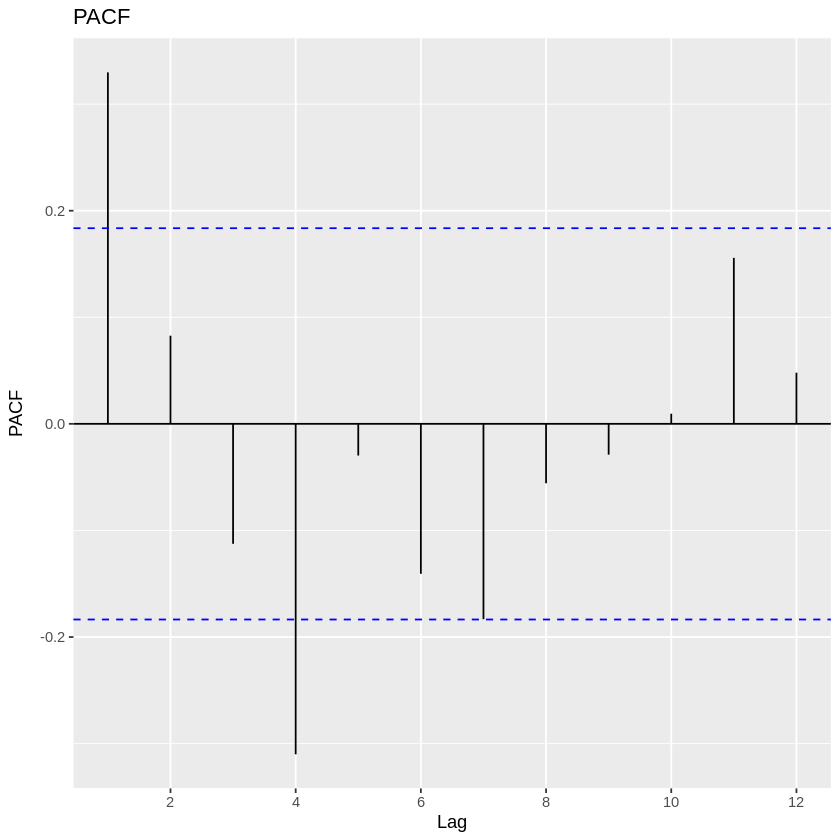

In [ ]:
# Plot Partial Autocorrelation Function
ggPacf(ddif1,lag.max = 12) + ggtitle("PACF")

Dari plot PACF di atas, diperoleh bahwa sebelum lag keempat, plot terpotong terakhir pada lag keempat, sehingga diperoleh parameter autoregresif p = 4.

In [ ]:
pacf(ddif1, lag.max=5, plot=F)


Partial autocorrelations of series ‘ddif1’, by lag

0.0833 0.1667 0.2500 0.3333 0.4167 
 0.330  0.083 -0.113 -0.310 -0.030 


## Estimasi Model

Model awal
d = 1
p = 4
q = 4




1. ARIMA(0,1,1)
2. ARIMA(0,1,2)
3. ARIMA(0,1,3)
4. ARIMA(0,1,4)
5. ARIMA(1,1,0)
6. ARIMA(1,1,1)
7. ARIMA(1,1,2)
8. ARIMA(1,1,3)
9. ARIMA(1,1,4)
10. ARIMA(2,1,0)
11. ARIMA(2,1,1)
12. ARIMA(2,1,2)
13. ARIMA(2,1,3)
14. ARIMA(2,1,4)
15. ARIMA(3,1,0)
16. ARIMA(3,1,1)
17. ARIMA(3,1,2)
18. ARIMA(3,1,3)
19. ARIMA(3,1,4)
20. ARIMA(4,1,0)
21. ARIMA(4,1,1)
22. ARIMA(4,1,2)
23. ARIMA(4,1,3)
24. ARIMA(4,1,4)



## Dengan Memasukkan Konstanta

In [ ]:
library("lmtest")

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
# =============================
# Dengan Konstanta (c)
# =============================

c011 <- Arima(bpu_ts, order = c(0,1,1), include.constant = TRUE, lambda = 0)
coeftest(c011)

c012 <- Arima(bpu_ts, order = c(0,1,2), include.constant = TRUE, lambda = 0)
coeftest(c012)

c013 <- Arima(bpu_ts, order = c(0,1,3), include.constant = TRUE, lambda = 0)
coeftest(c013)

c014 <- Arima(bpu_ts, order = c(0,1,4), include.constant = TRUE, lambda = 0)
coeftest(c014)


c110 <- Arima(bpu_ts, order = c(1,1,0), include.constant = TRUE, lambda = 0)
coeftest(c110)

c111 <- Arima(bpu_ts, order = c(1,1,1), include.constant = TRUE, lambda = 0)
coeftest(c111)

c112 <- Arima(bpu_ts, order = c(1,1,2), include.constant = TRUE, lambda = 0)
coeftest(c112)

c113 <- Arima(bpu_ts, order = c(1,1,3), include.constant = TRUE, lambda = 0)
coeftest(c113)

c114 <- Arima(bpu_ts, order = c(1,1,4), include.constant = TRUE, lambda = 0)
coeftest(c114)


c210 <- Arima(bpu_ts, order = c(2,1,0), include.constant = TRUE, lambda = 0)
coeftest(c210)

c211 <- Arima(bpu_ts, order = c(2,1,1), include.constant = TRUE, lambda = 0)
coeftest(c211)

c212 <- Arima(bpu_ts, order = c(2,1,2), include.constant = TRUE, lambda = 0)
coeftest(c212)

c213 <- Arima(bpu_ts, order = c(2,1,3), include.constant = TRUE, lambda = 0)
coeftest(c213)

c214 <- Arima(bpu_ts, order = c(2,1,4), include.constant = TRUE, lambda = 0)
coeftest(c214)


c310 <- Arima(bpu_ts, order = c(3,1,0), include.constant = TRUE, lambda = 0)
coeftest(c310)

c311 <- Arima(bpu_ts, order = c(3,1,1), include.constant = TRUE, lambda = 0)
coeftest(c311)

c312 <- Arima(bpu_ts, order = c(3,1,2), include.constant = TRUE, lambda = 0)
coeftest(c312)

c313 <- Arima(bpu_ts, order = c(3,1,3), include.constant = TRUE, lambda = 0)
coeftest(c313)

c314 <- Arima(bpu_ts, order = c(3,1,4), include.constant = TRUE, lambda = 0)
coeftest(c314)


c410 <- Arima(bpu_ts, order = c(4,1,0), include.constant = TRUE, lambda = 0)
coeftest(c410)

c411 <- Arima(bpu_ts, order = c(4,1,1), include.constant = TRUE, lambda = 0)
coeftest(c411)

c412 <- Arima(bpu_ts, order = c(4,1,2), include.constant = TRUE, lambda = 0)
coeftest(c412)

c413 <- Arima(bpu_ts, order = c(4,1,3), include.constant = TRUE, lambda = 0)
coeftest(c413)

c414 <- Arima(bpu_ts, order = c(4,1,4), include.constant = TRUE, lambda = 0)
coeftest(c414)


z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)   
ma1   0.247211   0.086359  2.8626 0.004202 **
drift 0.017613   0.016081  1.0953 0.273395   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)  
ma1   0.182446   0.109248  1.6700  0.09492 .
ma2   0.266939   0.120154  2.2216  0.02631 *
drift 0.019115   0.018217  1.0493  0.29405  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ma1   0.281318   0.094017  2.9922 0.0027697 ** 
ma2   0.381018   0.098892  3.8529 0.0001167 ***
ma3   0.292497   0.103294  2.8317 0.0046300 ** 
drift 0.022489   0.023678  0.9498 0.3422128    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ma1    0.258233   0.104614  2.4684 0.0135700 *  
ma2    0.357707   0.107532  3.3265 0.0008794 ***
ma3    0.278152   0.106862  2.6029 0.0092439 ** 
ma4   -0.057040   0.121663 -0.4688 0.6391853    
drift  0.021632   0.022331  0.9687 0.3327058    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value  Pr(>|z|)    
ar1   0.327718   0.095112  3.4456 0.0005698 ***
drift 0.019174   0.018897  1.0147 0.3102510    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)    
ar1    0.599087   0.162441  3.6880 0.000226 ***
ma1   -0.290942   0.175831 -1.6547 0.097992 .  
drift  0.021622   0.022314  0.9690 0.332543    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)  
ar1    0.401840   0.179562  2.2379  0.02523 *
ma1   -0.174053   0.160684 -1.0832  0.27872  
ma2    0.293978   0.137002  2.1458  0.03189 *
drift  0.022336   0.023158  0.9645  0.33480  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1   -0.088866   0.281674 -0.3155 0.7523893    
ma1    0.360046   0.263285  1.3675 0.1714634    
ma2    0.395460   0.106022  3.7300 0.0001915 ***
ma3    0.321012   0.133358  2.4071 0.0160776 *  
drift  0.022143   0.023117  0.9579 0.3381216    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1   -0.633213   0.486009 -1.3029 0.192615   
ma1    0.926033   0.481665  1.9226 0.054535 . 
ma2    0.577561   0.189289  3.0512 0.002279 **
ma3    0.536898   0.221042  2.4289 0.015143 * 
ma4    0.220678   0.174948  1.2614 0.207169   
drift  0.022712   0.024177  0.9394 0.347511   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)   
ar1   0.270102   0.098801  2.7338 0.006261 **
ar2   0.185417   0.102569  1.8077 0.070647 . 
drift 0.022252   0.022992  0.9678 0.333150   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)
ar1   0.254062   0.325002  0.7817   0.4344
ar2   0.190831   0.145506  1.3115   0.1897
ma1   0.016218   0.313853  0.0517   0.9588
drift 0.022224   0.022949  0.9684   0.3328



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1    0.679039   0.291597  2.3287   0.01988 *  
ar2   -0.432207   0.207096 -2.0870   0.03689 *  
ma1   -0.446613   0.246953 -1.8085   0.07053 .  
ma2    0.641643   0.134800  4.7600 1.936e-06 ***
drift  0.019468   0.019364  1.0054   0.31471    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1    0.106502   0.295066  0.3609 0.718143   
ar2   -0.356095   0.265852 -1.3394 0.180425   
ma1    0.150722   0.296777  0.5079 0.611548   
ma2    0.649442   0.199362  3.2576 0.001124 **
ma3    0.282367   0.152001  1.8577 0.063217 . 
drift  0.019863   0.020168  0.9849 0.324685   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1    0.920892   0.285735  3.2229 0.001269 **
ar2   -0.024041   0.271667 -0.0885 0.929485   
ma1   -0.698647   0.271106 -2.5770 0.009965 **
ma2    0.111400   0.237467  0.4691 0.638984   
ma3   -0.085948   0.126855 -0.6775 0.498069   
ma4   -0.326796   0.137950 -2.3689 0.017839 * 
drift  0.016131   0.005778  2.7918 0.005241 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1    0.270842   0.099064  2.7340 0.006257 **
ar2    0.188886   0.108643  1.7386 0.082107 . 
ar3   -0.010367   0.108138 -0.0959 0.923623   
drift  0.022032   0.022846  0.9644 0.334863   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)
ar1   -0.234231   0.720662 -0.3250   0.7452
ar2    0.304988   0.225342  1.3534   0.1759
ar3    0.140377   0.155628  0.9020   0.3671
ma1    0.503571   0.718624  0.7007   0.4835
drift  0.023002   0.023877  0.9634   0.3354



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1    0.454393   0.192830  2.3564  0.018451 *  
ar2   -0.571969   0.200657 -2.8505  0.004365 ** 
ar3    0.204480   0.137171  1.4907  0.136043    
ma1   -0.204435   0.167547 -1.2202  0.222405    
ma2    0.799494   0.133341  5.9958 2.024e-09 ***
drift  0.020451   0.021187  0.9652  0.334424    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1    0.195652   0.498059  0.3928 0.694446   
ar2   -0.420059   0.371166 -1.1317 0.257749   
ar3    0.072915   0.297508  0.2451 0.806390   
ma1    0.064293   0.498239  0.1290 0.897326   
ma2    0.694748   0.264126  2.6304 0.008529 **
ma3    0.204879   0.371279  0.5518 0.581071   
drift  0.020166   0.020667  0.9758 0.329185   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value  Pr(>|z|)    
ar1   -1.243994   0.177109 -7.0239 2.158e-12 ***
ar2   -0.437686   0.286673 -1.5268  0.126817    
ar3    0.061486   0.180040  0.3415  0.732718    
ma1    1.588220   0.151905 10.4554 < 2.2e-16 ***
ma2    1.226539   0.288837  4.2465 2.172e-05 ***
ma3    0.781384   0.269068  2.9040  0.003684 ** 
ma4    0.543524   0.130272  4.1722 3.016e-05 ***
drift  0.021956   0.022596  0.9717  0.331202    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)   
ar1    0.277727   0.096917  2.8656 0.004162 **
ar2    0.202666   0.106945  1.8951 0.058085 . 
ar3    0.072712   0.112171  0.6482 0.516841   
ar4   -0.234573   0.105700 -2.2192 0.026471 * 
drift  0.018914   0.018209  1.0387 0.298953   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)  
ar1    0.583698   0.374678  1.5579  0.11926  
ar2    0.124270   0.153249  0.8109  0.41742  
ar3    0.013717   0.151363  0.0906  0.92779  
ar4   -0.237941   0.111383 -2.1363  0.03266 *
ma1   -0.324193   0.384805 -0.8425  0.39952  
drift  0.017867   0.016300  1.0961  0.27303  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

        Estimate Std. Error z value Pr(>|z|)   
ar1    0.8198114  0.4770217  1.7186 0.085686 . 
ar2    0.4117990  0.5953884  0.6916 0.489159   
ar3   -0.1368583  0.1519710 -0.9006 0.367825   
ar4   -0.1791198  0.1401536 -1.2780 0.201241   
ma1   -0.5963267  0.4760264 -1.2527 0.210308   
ma2   -0.4036722  0.4750687 -0.8497 0.395485   
drift  0.0165448  0.0053652  3.0837 0.002044 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

        Estimate Std. Error z value  Pr(>|z|)    
ar1    1.3872720  0.1851493  7.4927 6.746e-14 ***
ar2   -0.9617740  0.3138060 -3.0649  0.002178 ** 
ar3    0.7440510  0.2765719  2.6903  0.007140 ** 
ar4   -0.2494856  0.1364371 -1.8286  0.067463 .  
ma1   -1.1710617  0.1644572 -7.1208 1.073e-12 ***
ma2    0.9421287  0.2329688  4.0440 5.254e-05 ***
ma3   -0.7710617  0.1524745 -5.0570 4.259e-07 ***
drift  0.0160778  0.0058113  2.7667  0.005663 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in sqrt(diag(se)):
“NaNs produced”



z test of coefficients:

       Estimate Std. Error z value Pr(>|z|)
ar1    0.139106        NaN     NaN      NaN
ar2   -0.477116        NaN     NaN      NaN
ar3   -0.166063        NaN     NaN      NaN
ar4    0.197344        NaN     NaN      NaN
ma1    0.106548        NaN     NaN      NaN
ma2    0.782933        NaN     NaN      NaN
ma3    0.434091        NaN     NaN      NaN
ma4   -0.095884        NaN     NaN      NaN
drift  0.018979   0.020308  0.9345     0.35


## Tanpa Konstanta

In [ ]:
# =============================
# Tanpa Konstanta (tc)
# =============================

tc011 <- Arima(bpu_ts, order = c(0,1,1), include.constant = FALSE, lambda = 0)
coeftest(tc011)

tc012 <- Arima(bpu_ts, order = c(0,1,2), include.constant = FALSE, lambda = 0)
coeftest(tc012)

tc013 <- Arima(bpu_ts, order = c(0,1,3), include.constant = FALSE, lambda = 0)
coeftest(tc013)

tc014 <- Arima(bpu_ts, order = c(0,1,4), include.constant = FALSE, lambda = 0)
coeftest(tc014)


tc110 <- Arima(bpu_ts, order = c(1,1,0), include.constant = FALSE, lambda = 0)
coeftest(tc110)

tc111 <- Arima(bpu_ts, order = c(1,1,1), include.constant = FALSE, lambda = 0)
coeftest(tc111)

tc112 <- Arima(bpu_ts, order = c(1,1,2), include.constant = FALSE, lambda = 0)
coeftest(tc112)

tc113 <- Arima(bpu_ts, order = c(1,1,3), include.constant = FALSE, lambda = 0)
coeftest(tc113)

tc114 <- Arima(bpu_ts, order = c(1,1,4), include.constant = FALSE, lambda = 0)
coeftest(tc114)


tc210 <- Arima(bpu_ts, order = c(2,1,0), include.constant = FALSE, lambda = 0)
coeftest(tc210)

tc211 <- Arima(bpu_ts, order = c(2,1,1), include.constant = FALSE, lambda = 0)
coeftest(tc211)

tc212 <- Arima(bpu_ts, order = c(2,1,2), include.constant = FALSE, lambda = 0)
coeftest(tc212)

tc213 <- Arima(bpu_ts, order = c(2,1,3), include.constant = FALSE, lambda = 0)
coeftest(tc213)

tc214 <- Arima(bpu_ts, order = c(2,1,4), include.constant = FALSE, lambda = 0)
coeftest(tc214)


tc310 <- Arima(bpu_ts, order = c(3,1,0), include.constant = FALSE, lambda = 0)
coeftest(tc310)

tc311 <- Arima(bpu_ts, order = c(3,1,1), include.constant = FALSE, lambda = 0)
coeftest(tc311)

tc312 <- Arima(bpu_ts, order = c(3,1,2), include.constant = FALSE, lambda = 0)
coeftest(tc312)

tc313 <- Arima(bpu_ts, order = c(3,1,3), include.constant = FALSE, lambda = 0)
coeftest(tc313)

tc314 <- Arima(bpu_ts, order = c(3,1,4), include.constant = FALSE, lambda = 0)
coeftest(tc314)


tc410 <- Arima(bpu_ts, order = c(4,1,0), include.constant = FALSE, lambda = 0)
coeftest(tc410)

tc411 <- Arima(bpu_ts, order = c(4,1,1), include.constant = FALSE, lambda = 0)
coeftest(tc411)

tc412 <- Arima(bpu_ts, order = c(4,1,2), include.constant = FALSE, lambda = 0)
coeftest(tc412)

tc413 <- Arima(bpu_ts, order = c(4,1,3), include.constant = FALSE, lambda = 0)
coeftest(tc413)

tc414 <- Arima(bpu_ts, order = c(4,1,4), include.constant = FALSE, lambda = 0)
coeftest(tc414)


z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ma1 0.251884   0.086372  2.9163 0.003543 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ma1  0.18672    0.10975  1.7013  0.08889 .
ma2  0.26915    0.12020  2.2392  0.02514 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ma1 0.286367   0.093892  3.0500  0.002289 ** 
ma2 0.385767   0.098524  3.9155 9.023e-05 ***
ma3 0.296579   0.103134  2.8757  0.004032 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ma1  0.265492   0.104669  2.5365 0.0111970 *  
ma2  0.364588   0.107657  3.3866 0.0007077 ***
ma3  0.283525   0.106879  2.6528 0.0079833 ** 
ma4 -0.051465   0.121476 -0.4237 0.6718107    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)    
ar1 0.335129   0.095248  3.5185 0.000434 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1  0.60776    0.16061  3.7841 0.0001543 ***
ma1 -0.29335    0.17441 -1.6820 0.0925665 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ar1  0.40949    0.17868  2.2917  0.02192 *
ma1 -0.17592    0.15948 -1.1031  0.27000  
ma2  0.29610    0.13752  2.1531  0.03131 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -0.081433   0.280415 -0.2904 0.7715101    
ma1  0.358303   0.261806  1.3686 0.1711305    
ma2  0.399190   0.106070  3.7635 0.0001676 ***
ma3  0.322859   0.133584  2.4169 0.0156532 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1 -0.63090    0.46429 -1.3589 0.174194   
ma1  0.92984    0.45982  2.0222 0.043154 * 
ma2  0.58642    0.18672  3.1406 0.001686 **
ma3  0.54338    0.21552  2.5213 0.011693 * 
ma4  0.22565    0.17190  1.3127 0.189279   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1 0.276168   0.098997  2.7896 0.005277 **
ar2 0.188520   0.102955  1.8311 0.067088 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)
ar1 0.261828   0.323758  0.8087   0.4187
ar2 0.193463   0.147068  1.3155   0.1884
ma1 0.014487   0.312579  0.0463   0.9630



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1  0.68064    0.28684  2.3729   0.01765 *  
ar2 -0.42756    0.20487 -2.0870   0.03689 *  
ma1 -0.44280    0.24200 -1.8297   0.06729 .  
ma2  0.63925    0.13501  4.7349 2.191e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)   
ar1  0.11088    0.29381  0.3774 0.705881   
ar2 -0.35071    0.26776 -1.3098 0.190265   
ma1  0.15223    0.29523  0.5156 0.606109   
ma2  0.64764    0.20004  3.2375 0.001206 **
ma3  0.28483    0.15193  1.8747 0.060833 . 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ar1  0.870270   0.306079  2.8433 0.004465 **
ar2 -0.098723   0.278392 -0.3546 0.722876   
ma1 -0.617163   0.291332 -2.1184 0.034140 * 
ma2  0.204420   0.240836  0.8488 0.395996   
ma3 -0.052429   0.133125 -0.3938 0.693705   
ma4 -0.287367   0.134054 -2.1437 0.032059 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

      Estimate Std. Error z value Pr(>|z|)   
ar1  0.2767960  0.0992686  2.7884 0.005298 **
ar2  0.1915173  0.1090589  1.7561 0.079073 . 
ar3 -0.0090721  0.1086030 -0.0835 0.933427   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)
ar1 -0.21692    0.69870 -0.3105   0.7562
ar2  0.30777    0.22276  1.3816   0.1671
ar3  0.14067    0.15694  0.8963   0.3701
ma1  0.49239    0.69641  0.7070   0.4795



z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1  0.46207    0.19145  2.4136  0.015798 *  
ar2 -0.57262    0.20238 -2.8294  0.004664 ** 
ar3  0.20843    0.13688  1.5227  0.127824    
ma1 -0.20569    0.16562 -1.2419  0.214261    
ma2  0.80067    0.13346  5.9994 1.981e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ar1  0.211165   0.504067  0.4189 0.675273   
ar2 -0.422975   0.377137 -1.1215 0.262057   
ar3  0.081164   0.299057  0.2714 0.786083   
ma1  0.054948   0.505031  0.1088 0.913360   
ma2  0.698333   0.266118  2.6241 0.008687 **
ma3  0.198359   0.375544  0.5282 0.597368   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1 -1.236550   0.176267 -7.0152 2.296e-12 ***
ar2 -0.426429   0.285448 -1.4939  0.135204    
ar3  0.066244   0.180050  0.3679  0.712931    
ma1  1.586614   0.150702 10.5282 < 2.2e-16 ***
ma2  1.226436   0.287224  4.2700 1.955e-05 ***
ma3  0.785043   0.268738  2.9212  0.003487 ** 
ma4  0.546542   0.130257  4.1959 2.718e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)   
ar1  0.283897   0.097186  2.9212 0.003487 **
ar2  0.205243   0.107420  1.9107 0.056049 . 
ar3  0.073136   0.112713  0.6489 0.516419   
ar4 -0.232015   0.106186 -2.1850 0.028889 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1  0.560326   0.352956  1.5875  0.11239  
ar2  0.132717   0.149946  0.8851  0.37610  
ar3  0.019435   0.147474  0.1318  0.89516  
ar4 -0.236327   0.109964 -2.1491  0.03162 *
ma1 -0.292210   0.359964 -0.8118  0.41692  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

    Estimate Std. Error z value Pr(>|z|)  
ar1  0.47286    0.20544  2.3016  0.02136 *
ar2 -0.45575    0.32172 -1.4166  0.15659  
ar3  0.20852    0.14867  1.4026  0.16074  
ar4 -0.11380    0.16417 -0.6932  0.48820  
ma1 -0.20238    0.18675 -1.0837  0.27851  
ma2  0.65291    0.31518  2.0715  0.03831 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



z test of coefficients:

     Estimate Std. Error z value  Pr(>|z|)    
ar1  0.563812   0.877944  0.6422 0.5207456    
ar2 -0.790056   0.499158 -1.5828 0.1134719    
ar3  0.213290   0.724514  0.2944 0.7684599    
ar4  0.049287   0.225613  0.2185 0.8270715    
ma1 -0.315528   0.873392 -0.3613 0.7179000    
ma2  1.004959   0.263939  3.8075 0.0001404 ***
ma3 -0.016590   0.870331 -0.0191 0.9847920    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Warning message in sqrt(diag(se)):
“NaNs produced”



z test of coefficients:

     Estimate Std. Error z value Pr(>|z|)  
ar1  0.407483        NaN     NaN      NaN  
ar2 -0.532878   0.423931 -1.2570  0.20876  
ar3  0.258815   0.334693  0.7733  0.43935  
ar4 -0.183449   0.293427 -0.6252  0.53184  
ma1 -0.137213        NaN     NaN      NaN  
ma2  0.751198   0.328141  2.2893  0.02206 *
ma3 -0.013515        NaN     NaN      NaN  
ma4  0.107252        NaN     NaN      NaN  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


## Model Signifikan

In [ ]:
library(lmtest)
library(dplyr)

# 1) gabungkan semua model yang sudah kamu fit ke dalam list
models <- list(
  c011=c011, c012=c012, c013=c013, c014=c014,
  c110=c110, c111=c111, c112=c112, c113=c113, c114=c114,
  c210=c210, c211=c211, c212=c212, c213=c213, c214=c214,
  c310=c310, c311=c311, c312=c312, c313=c313, c314=c314,
  c410=c410, c411=c411, c412=c412, c413=c413, c414=c414,
  tc011=tc011, tc012=tc012, tc013=tc013, tc014=tc014,
  tc110=tc110, tc111=tc111, tc112=tc112, tc113=tc113, tc114=tc114,
  tc210=tc210, tc211=tc211, tc212=tc212, tc213=tc213, tc214=tc214,
  tc310=tc310, tc311=tc311, tc312=tc312, tc313=tc313, tc314=tc314,
  tc410=tc410, tc411=tc411, tc412=tc412, tc413=tc413, tc414=tc414
)

# 2) fungsi cek: semua p-value koefisien < 0.05 dan tidak ada NA/NaN
check_all_sig <- function(fit, alpha = 0.05){
  ct <- coeftest(fit)
  pvals <- ct[, 4]                      # kolom Pr(>|z|)
  ok <- all(!is.na(pvals)) && all(pvals < alpha)
  return(ok)
}

# 3) buat ringkasan tabel
tab_sig <- tibble(
  model = names(models),
  AIC   = sapply(models, AIC),
  BIC   = sapply(models, BIC),
  semua_koef_sig_5pct = sapply(models, check_all_sig, alpha = 0.05)
) %>%
  arrange(desc(semua_koef_sig_5pct), AIC)

tab_sig


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in sqrt(diag(se)):
“NaNs produced”
Warning message in sqrt(diag(se)):
“NaNs produced”


model,AIC,BIC,semua_koef_sig_5pct
<chr>,<dbl>,<dbl>,<lgl>
tc013,-131.6757,-120.73090,TRUE
tc110,-126.3397,-120.86732,TRUE
tc011,-123.0125,-117.54011,TRUE
c013,-130.5713,-116.89027,FALSE
tc314,-130.4868,-108.59721,FALSE
tc014,-129.8544,-116.17343,FALSE
tc113,-129.7597,-116.07874,FALSE
tc212,-129.6113,-115.93028,FALSE
c314,-129.4245,-104.79869,FALSE


In [ ]:
model_lolos <- tab_sig %>% filter(semua_koef_sig_5pct) %>% pull(model)
model_lolos

[1] "tc013" "tc110" "tc011"

## Auto Arima

In [ ]:
fit_auto <- auto.arima(
  bpu_ts,
  d = 1,              # sesuai hasil uji stasioneritas
  seasonal = FALSE,   # TIDAK ada musiman
  lambda = 0,         # log-transform (opsional tapi disarankan)
  stepwise = FALSE,   # pencarian lebih menyeluruh
  approximation = FALSE
)

summary(fit_auto)
fit_auto

Series: bpu_ts 
ARIMA(0,1,3) 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1     ma2     ma3
      0.2864  0.3858  0.2966
s.e.  0.0939  0.0985  0.1031

sigma^2 = 0.01758:  log likelihood = 69.84
AIC=-131.68   AICc=-131.31   BIC=-120.73

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 107.9714 3282.075 2066.247 0.08403156 9.429577 0.2585931
                    ACF1
Training set -0.02076882

Series: bpu_ts 
ARIMA(0,1,3) 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1     ma2     ma3
      0.2864  0.3858  0.2966
s.e.  0.0939  0.0985  0.1031

sigma^2 = 0.01758:  log likelihood = 69.84
AIC=-131.68   AICc=-131.31   BIC=-120.73

Menggunakan Autoarima diperoleh model terbaik adalah model 𝐴𝑅𝐼𝑀𝐴(0,1,3) tanpa konstanta.

##Diagnostic Checking


	Box-Ljung test

data:  tc013$residuals
X-squared = 0.34436, df = 1, p-value = 0.5573



	Box-Ljung test

data:  (tc013$residuals)^2
X-squared = 0.016464, df = 1, p-value = 0.8979



	Jarque Bera Test

data:  tc013$residuals
X-squared = 31.131, df = 2, p-value = 1.738e-07



	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)
Q* = 15.762, df = 20, p-value = 0.7313

Model df: 3.   Total lags used: 23



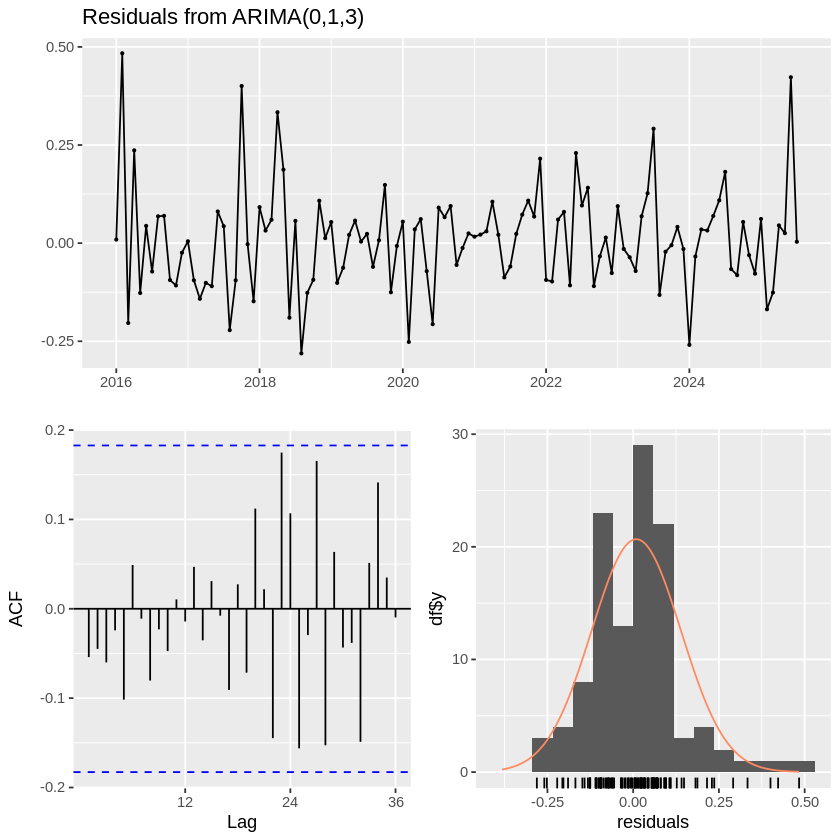

In [ ]:
Box.test(tc013$residuals,type="Ljung") #uji autokorelasi
Box.test((tc013$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc013$residuals) #uji normalitas
checkresiduals(tc013)


	Box-Ljung test

data:  tc110$residuals
X-squared = 1.144, df = 1, p-value = 0.2848



	Box-Ljung test

data:  (tc110$residuals)^2
X-squared = 0.00057126, df = 1, p-value = 0.9809



	Jarque Bera Test

data:  tc110$residuals
X-squared = 42.972, df = 2, p-value = 4.664e-10



	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 23.601, df = 22, p-value = 0.3685

Model df: 1.   Total lags used: 23



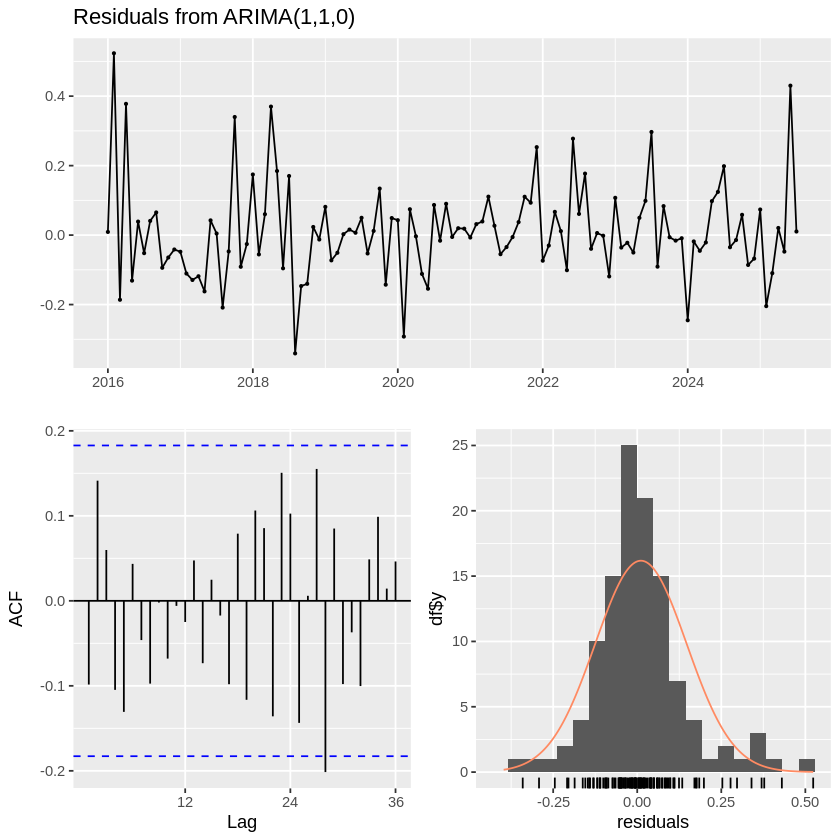

In [ ]:
Box.test(tc110$residuals,type="Ljung") #uji autokorelasi
Box.test((tc110$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc110$residuals) #uji normalitas
checkresiduals(tc110)


	Box-Ljung test

data:  tc011$residuals
X-squared = 0.0016563, df = 1, p-value = 0.9675



	Box-Ljung test

data:  (tc011$residuals)^2
X-squared = 0.13226, df = 1, p-value = 0.7161



	Jarque Bera Test

data:  tc011$residuals
X-squared = 44.838, df = 2, p-value = 1.834e-10



	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)
Q* = 22.606, df = 22, p-value = 0.4242

Model df: 1.   Total lags used: 23



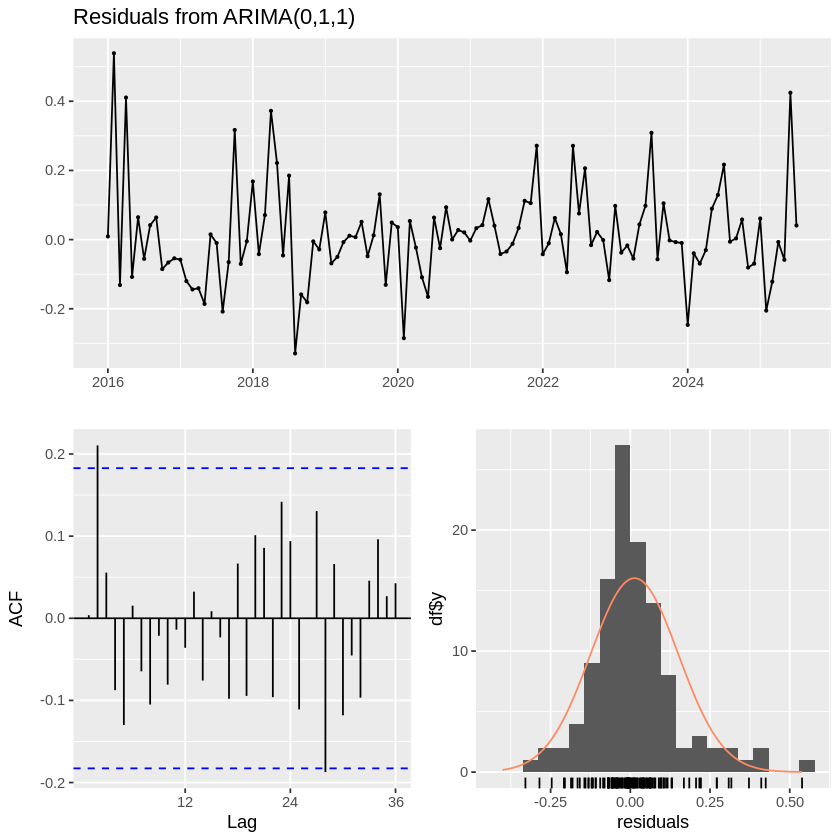

In [ ]:
Box.test(tc011$residuals,type="Ljung") #uji autokorelasi
Box.test((tc011$residuals)^2,type="Ljung") #uji homoskedastik
jarque.bera.test(tc011$residuals) #uji normalitas
checkresiduals(tc011)

## Pemilihan Model Terbaik

In [ ]:
# =========================
# Best Model Selection
# =========================

# Lihat model kandidat
tc013
tc110
tc011

# Buat ringkasan kriteria informasi
mod_tc013 <- data.frame(
  Model  = "ARIMA(0,1,3) [tc013]",
  LogLik = as.numeric(logLik(tc013)),
  AIC    = AIC(tc013),
  BIC    = BIC(tc013)
)

mod_tc110 <- data.frame(
  Model  = "ARIMA(1,1,0) [tc110]",
  LogLik = as.numeric(logLik(tc110)),
  AIC    = AIC(tc110),
  BIC    = BIC(tc110)
)

mod_tc011 <- data.frame(
  Model  = "ARIMA(0,1,1) [tc011]",
  LogLik = as.numeric(logLik(tc011)),
  AIC    = AIC(tc011),
  BIC    = BIC(tc011)
)

# Gabungkan semua kandidat
model_selection <- rbind(
  mod_tc013,
  mod_tc110,
  mod_tc011
)

# Urutkan berdasarkan AIC (terkecil = terbaik)
model_selection[order(model_selection$AIC), ]

Series: bpu_ts 
ARIMA(0,1,3) 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1     ma2     ma3
      0.2864  0.3858  0.2966
s.e.  0.0939  0.0985  0.1031

sigma^2 = 0.01758:  log likelihood = 69.84
AIC=-131.68   AICc=-131.31   BIC=-120.73

Series: bpu_ts 
ARIMA(1,1,0) 
Box Cox transformation: lambda= 0 

Coefficients:
         ar1
      0.3351
s.e.  0.0952

sigma^2 = 0.01881:  log likelihood = 65.17
AIC=-126.34   AICc=-126.23   BIC=-120.87

Series: bpu_ts 
ARIMA(0,1,1) 
Box Cox transformation: lambda= 0 

Coefficients:
         ma1
      0.2519
s.e.  0.0864

sigma^2 = 0.01938:  log likelihood = 63.51
AIC=-123.01   AICc=-122.9   BIC=-117.54

,Model,LogLik,AIC,BIC
,<chr>,<dbl>,<dbl>,<dbl>
1,"ARIMA(0,1,3) [tc013]",69.83785,-131.6757,-120.7309
2,"ARIMA(1,1,0) [tc110]",65.16986,-126.3397,-120.8673
3,"ARIMA(0,1,1) [tc011]",63.50625,-123.0125,-117.5401


# Forecast

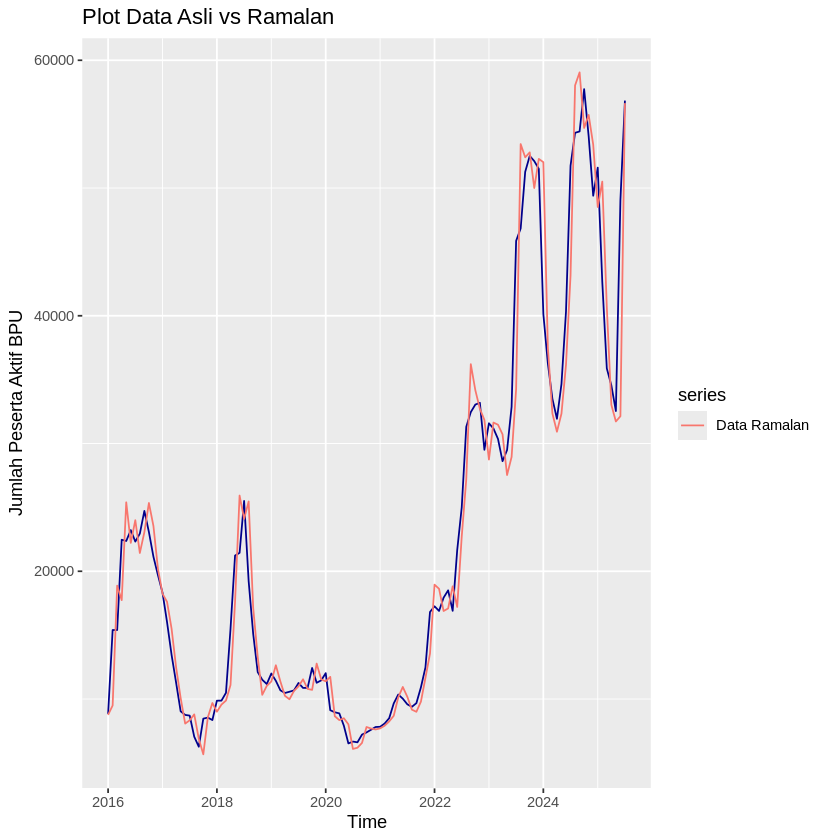

In [ ]:
#Best model
##Plot##
autoplot(tc013$x, col="darkblue") +
  autolayer(fitted(tc013), series = "Data Ramalan") +
  ylab("Jumlah Peserta Aktif BPU") +
  ggtitle("Plot Data Asli vs Ramalan")

In [ ]:
accuracy(tc013)
forecast(tc013,6)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,107.9714,3282.075,2066.247,0.08403156,9.429577,0.2585931,-0.02076882


         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Aug 2025       67485.29 56939.59  79984.13 52041.50  87512.16
Sep 2025       76600.55 58075.83 101034.20 50158.67 116981.65
Oct 2025       76680.59 51570.07 114017.94 41801.72 140662.01
Nov 2025       76680.59 45637.32 128840.02 34675.20 169571.15
Dec 2025       76680.59 41357.21 142173.85 29827.00 197133.95
Jan 2026       76680.59 37994.65 154756.35 26199.01 224432.70

Hasil peramalan menunjukkan bahwa jumlah peserta aktif BPU diperkirakan
mengalami peningkatan hingga awal tahun 2026. Nilai ramalan titik berada pada kisaran 67.000 hingga 76.000 peserta. Peningkatan tersebut mengindikasikan adanya potensi pertumbuhan kepesertaan BPU di Kota Yogyakarta.